# Discriptive analysis of crime against women from 2001-2013 yearly

In [1]:
#import libraries....

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#plotting and visualization

#from subprocess import check_output
#print(check_output(["ls", "/home/java/Downloads/HORIZON2020/DATASETS/women/"]).decode("utf8"))

# Considering data between 2001 to 2013
crimes1 = pd.read_csv('/home/java/Downloads/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('/home/java/Downloads/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2013.csv')

# Concat data sets from 2 files
crimes = pd.concat([crimes1,crimes2],  ignore_index=False, axis=0)

# rename the STATE/UT column to STATE
crimes.rename(columns={'STATE/UT':'STATE'}, inplace=True)

# delete data sets post concat
del crimes1
del crimes2

print('Dataset is ready....')

# know the shape of dataset
crimes.shape

# collect the state names in a list and print
states = crimes.STATE.unique()


# do some data cleansing on state names

for i in range(0, len(states)):
    states[i] = states[i].lower()
    
for j in range(0, len(states)):
    if states[j] == 'a & n islands':
       states[j] = 'a&n islands'
    
    if  states[j] == 'd & n haveli':
        states[j] = 'd&n haveli'
        
print('\n Dataset after cleaning and removing duplicates....\n')

# remove duplicate state names from the list
states = np.unique(states).tolist()
print(states)

# convert the state names to lower
crimes['STATE'] = crimes['STATE'].str.lower()
crimes.head(3)

# filter out the Total crimes for each State & UT
crimes_total = crimes[crimes['DISTRICT'] == 'TOTAL']

# drop DISTRCT Column as we do not intend to use at this point
crimes_total.drop('DISTRICT', axis=1, inplace=True)

# filter out the Total crimes for each State & UT for the year 2001
crimes_total_2001 = crimes_total[crimes_total['Year'] == 2001]
crimes_total_2001.drop('Year', axis=1, inplace=True)

# Data of Rape crime committed in the year 2001 per state
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Rape'].values



Dataset is ready....

 Dataset after cleaning and removing duplicates....

['a&n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd&n haveli', 'daman & diu', 'delhi', 'delhi ut', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# plot the bar graph for Rape commited against women in year 2001 vs states


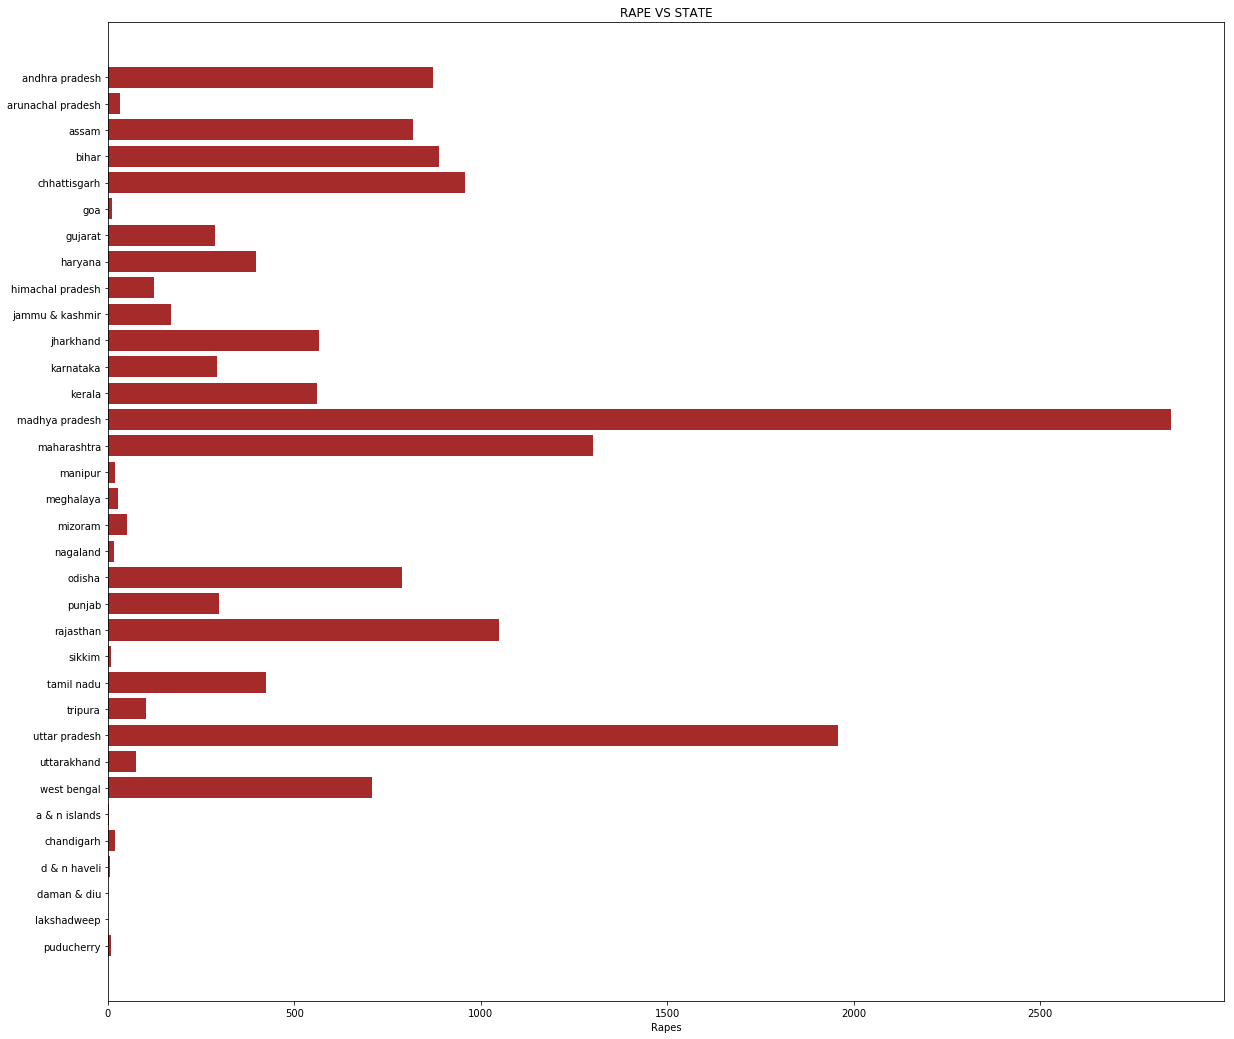

In [21]:
# Any results you write to the current directory are saved as output.

# creating a new data set

crimes_total_women1 = pd.read_csv('/home/java/Downloads/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes_total_women2 = pd.read_csv('/home/java/Downloads/HORIZON2020/DATASETS/women/42_District_wise_crimes_committed_against_women_2013.csv')

crimes_total_women = pd.concat([crimes_total_women1,crimes_total_women2],  ignore_index=False, axis=0)
crimes_total_women.rename(columns={'STATE/UT':'STATE'}, inplace=True)

del crimes_total_women1
del crimes_total_women2

# calculating total crimes of all kinds in each state from 2001 to 2013
crimes_total_women = crimes_total_women[crimes_total_women['DISTRICT'] == 'TOTAL']
crimes_total_women.drop('DISTRICT', axis=1, inplace=True)

crimes_total_women['Total Crimes']= crimes_total_women.iloc[:, -9:-1].sum(axis=1)

crimes_total_women = crimes_total_women.groupby(['STATE'])['Total Crimes'].sum()
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Rape'].values
ax.barh(y_pos, performance, align='center',color='brown', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rapes')
ax.set_title('RAPE VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()


# Number of Dowry Deaths committed in the year 2001 per state


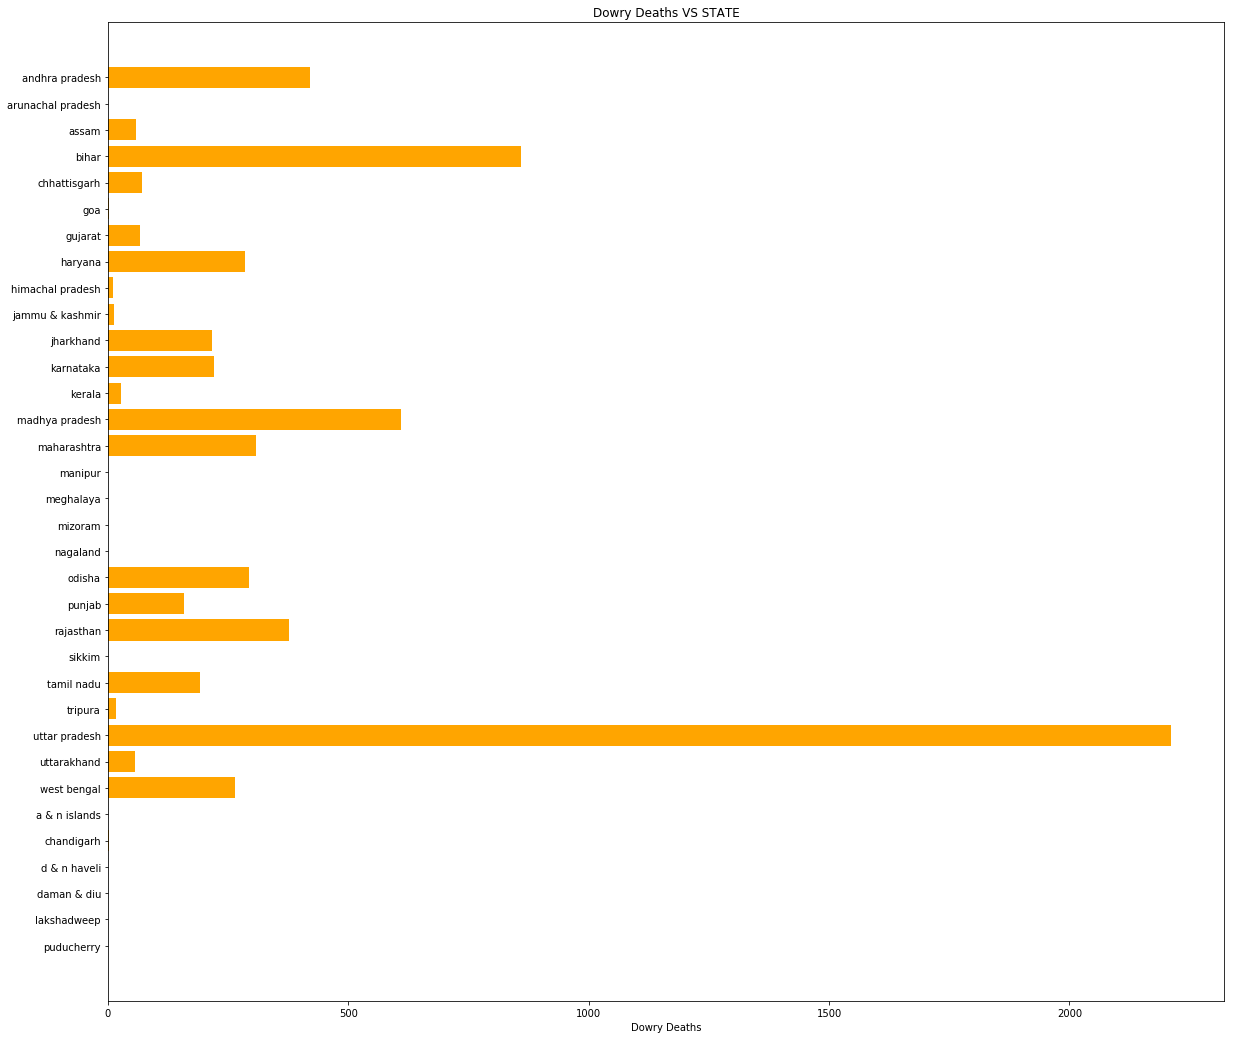

In [9]:
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Dowry Deaths'].values

# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Dowry Deaths'].values
ax.barh(y_pos, performance, align='center',color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dowry Deaths')
ax.set_title('Dowry Deaths VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()


# Number of assaults committed in the year 2001 per state


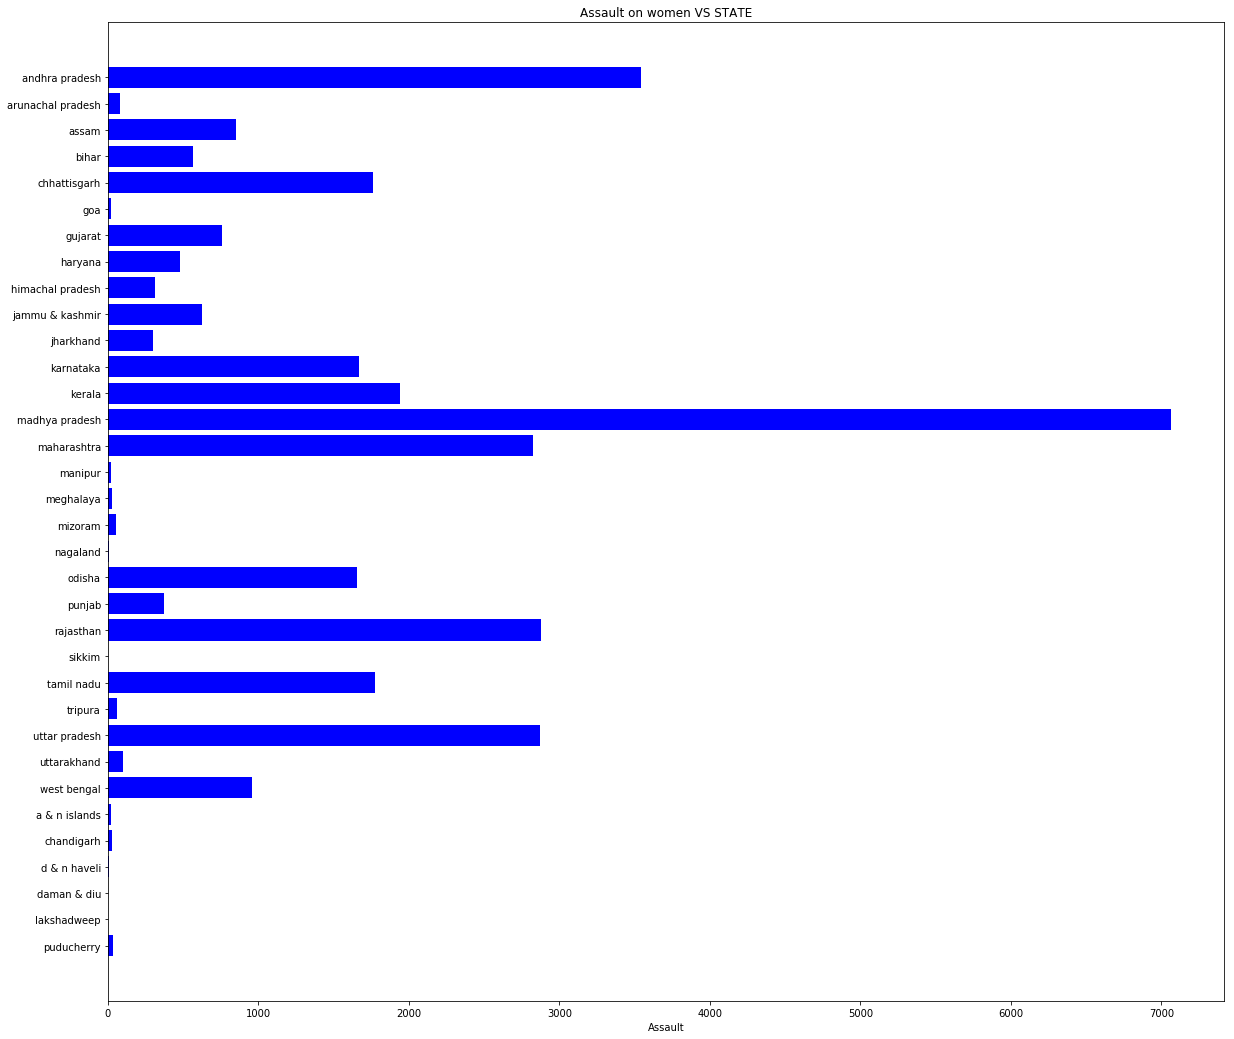

In [15]:
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Assault on women with intent to outrage her modesty'].values

# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Assault on women with intent to outrage her modesty'].values
ax.barh(y_pos, performance, align='center',color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Assault')
ax.set_title('Assault on women VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()

# plot of total crimes committed on women since 2001-2013 in each states_ UT


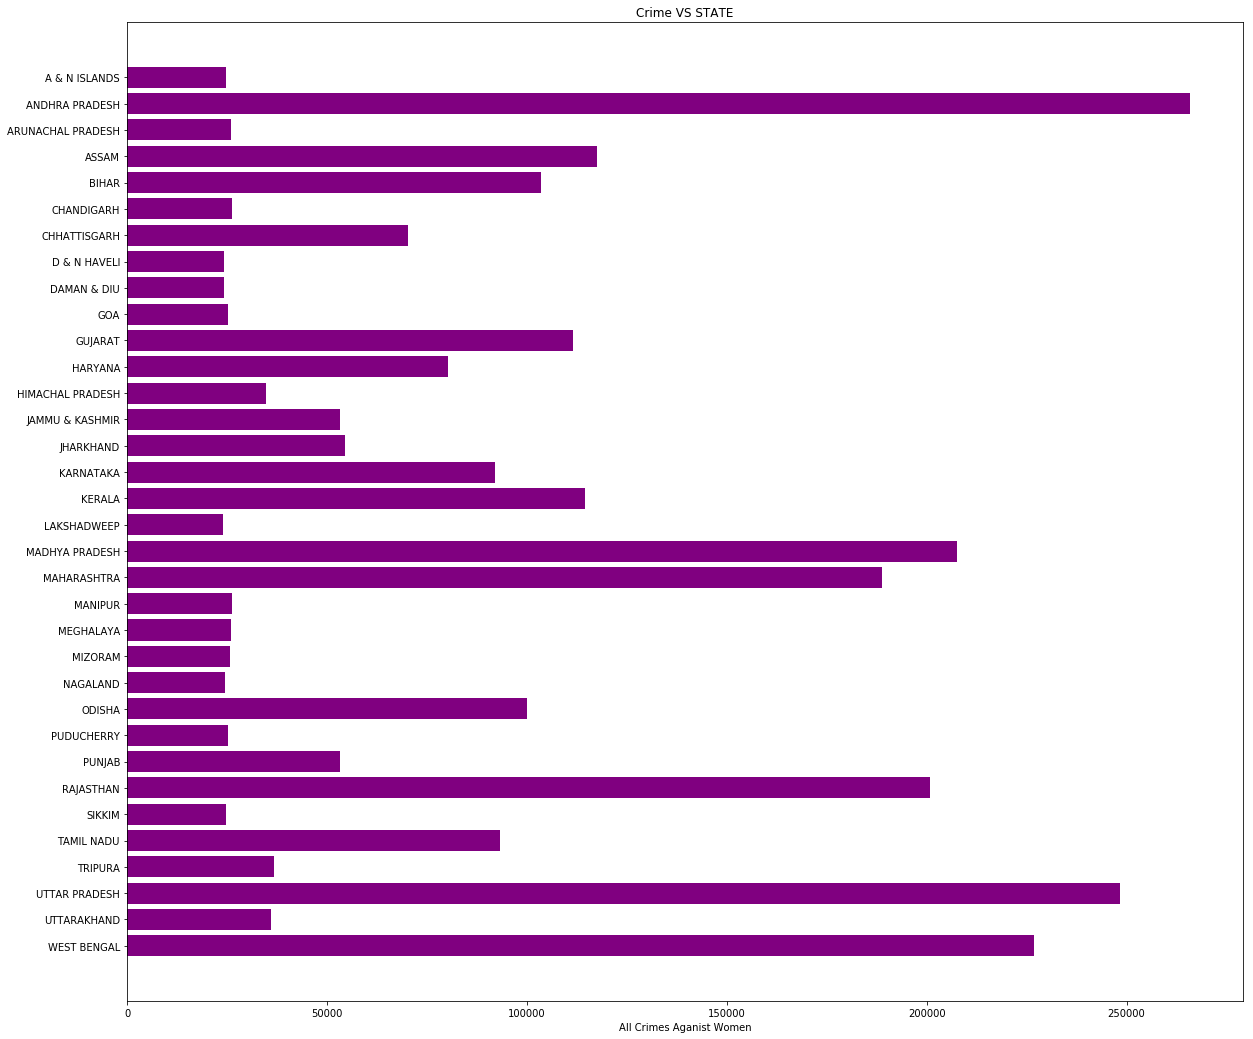

In [18]:
fig1, ax1 = plt.subplots()
states = crimes_total_women.index.tolist()
y_pos = np.arange(len(states))
performance = crimes_total_women.tolist()
ax1.barh(y_pos, performance, align='center',color='purple', ecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(states)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('All Crimes Aganist Women')
ax1.set_title('Crime VS STATE')
fig1.set_size_inches(20, 18, forward=True)
plt.show()

# plotting scatter plot state vs total crimes against women 


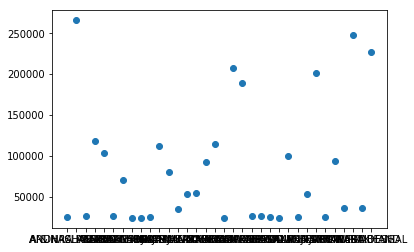

In [35]:
plt.scatter(states,crimes_total_women)
plt.show()